In [2]:
# Load Libraries

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Define Line Width and Font Size of Plots
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['font.size'] = 6.0
plt.rcParams['axes.titlesize'] = 6.0

In [3]:
# Preprocessing Definition

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
# Load Images and Preprocessing (Resize, Scale, Batch Size Definition)

img_size = 30
batch_size = 32

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (img_size, img_size),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary',
                                                 color_mode = 'rgb')
 
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (img_size, img_size),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            color_mode = 'rgb')

Found 25998 images belonging to 2 classes.
Found 1560 images belonging to 2 classes.


The shape is (batch size, height, width, channels): (32, 30, 30, 3)


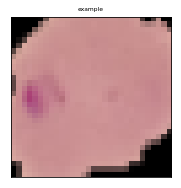

In [5]:
# Sanity Check

print('The shape is (batch size, height, width, channels):',training_set[0][0].shape)

fig, ax = plt.subplots(1, 1,figsize=(2.95,2.95))
ax.set_title('example')
ax.imshow(training_set[0][0][0])
plt.xticks(())
plt.yticks(())
plt.savefig('example',dpi=900,transparent=True,orientation='landscape',bbox_inches='tight')
plt.savefig('example',dpi=900,transparent=True,orientation='landscape',bbox_inches='tight',format='pdf')

In [6]:
# Model Definition

training_set_size = 25998
test_set_size = 1560

model = keras.Sequential([
    keras.layers.Convolution2D(5,(3,3),input_shape=(img_size,img_size,training_set[0][0].shape[3]),padding='same',data_format='channels_last',activation='relu'),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Convolution2D(10,(3,3),padding='same',data_format='channels_last',activation='relu'),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Flatten(),
    #keras.layers.Dense(10, activation = 'relu'), # if you have a good CPU/GPU :S
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 5)         140       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 10)        460       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 641       
Total params: 1,241
Trainable params: 1,241
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Model Fitting

epochs = 5 # should lead to about 80-90% accuarcy

model.fit_generator(training_set,
                    steps_per_epoch = (training_set_size/batch_size),
                    epochs = epochs,
                    validation_data = test_set,
                    validation_steps = (test_set_size/batch_size))

Epoch 1/5
813/812 [==============================] - 328s 403ms/step - loss: 0.6470 - acc: 0.6246 - val_loss: 0.4690 - val_acc: 0.8038
Epoch 2/5
813/812 [==============================] - 166s 204ms/step - loss: 0.5470 - acc: 0.7349 - val_loss: 0.4207 - val_acc: 0.7987
Epoch 3/5
813/812 [==============================] - 159s 195ms/step - loss: 0.4881 - acc: 0.7765 - val_loss: 0.3871 - val_acc: 0.8154
Epoch 4/5
813/812 [==============================] - 148s 182ms/step - loss: 0.4405 - acc: 0.8039 - val_loss: 0.3370 - val_acc: 0.8571
Epoch 5/5
813/812 [==============================] - 166s 205ms/step - loss: 0.4008 - acc: 0.8258 - val_loss: 0.2881 - val_acc: 0.8769


In [8]:
# Model Saving

model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')
print('Saved model to disk.')

Saved model to disk.


In [ ]:
# Model Loading

#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights('model.h5')
#print('Loaded model from disk.')